# 多クラス分類

[畳み込みニューラルネットワーク (Convolutional Neural Networks)  |  TensorFlow Core](https://www.tensorflow.org/tutorials/images/cnn?hl=ja)

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras 

import matplotlib.pyplot as plt
import seaborn as sns

# データセットの読み込み

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

$W \times W \times K = $28×28×1の画像を6万点 + 1万点格納しているデータセット

In [4]:
print("学習用データ = ", train_images.shape)
print("検証用データ = ", test_images.shape)
pd.Series(train_labels).value_counts()

学習用データ =  (60000, 28, 28, 1)
検証用データ =  (10000, 28, 28, 1)


9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

# 前処理

In [5]:
# ピクセルの値を 0~1 の間に正規化
train_images, test_images = train_images / 255.0, test_images / 255.0

# CNNの構築

In [6]:
IMAGE_HEIGHT, IMAGE_WIDTH, COLOR_CHANNELS = train_images.shape[1:]

In [7]:
print("画素数 = {}×{}".format(IMAGE_HEIGHT, IMAGE_WIDTH))
print("チャネル数 = {}".format(COLOR_CHANNELS))

画素数 = 28×28
チャネル数 = 1


## モデリング

**ハイパーパラメーター**


| ハイパーパラメーター | 値 | 説明 | 適用する層 |
|:-----------------------:|:----|:------|:-------------|
| パディング(padding) | ゼロパディング,　...　 | 入力画像の外側に幅$[H(フィルターサイズ)/2]$の「ふち」をつけて大きくし、出力画像のサイズが元の入力画像と同サイズになるようにする | 畳込み層 |
| ストライド(stride) | 整数値 | フィルタの適用位置を１画素ずつではなく、数画素ずつずらして計算する | 畳込み層, プーリング層 |
| フィルタの種類数($M$) | 1以上の整数値 | ... | 畳込み層 |

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


カーネルサイズ = (3, 3)  # フィルタのサイズ
フィルターの種類数 = 32
ゼロパディング = "valid"  # zero-padding

model = Sequential([
    Conv2D(フィルターの種類数, カーネルサイズ, strides=(1, 1), padding=ゼロパディング, activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, COLOR_CHANNELS)),
    MaxPooling2D(pool_size=(2, 2), strides=None, padding=ゼロパディング),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
epochs = 5
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 49s 812us/sample - loss: 0.0857 - accuracy: 0.9668 - val_loss: 0.3713 - val_accuracy: 0.9095
Epoch 2/5
60000/60000 [==============================] - 51s 852us/sample - loss: 0.0792 - accuracy: 0.9695 - val_loss: 0.3620 - val_accuracy: 0.9087
Epoch 3/5
60000/60000 [==============================] - 52s 858us/sample - loss: 0.0779 - accuracy: 0.9700 - val_loss: 0.3623 - val_accuracy: 0.9100
Epoch 4/5
60000/60000 [==============================] - 50s 836us/sample - loss: 0.0714 - accuracy: 0.9724 - val_loss: 0.3945 - val_accuracy: 0.9065
Epoch 5/5
60000/60000 [==============================] - 54s 892us/sample - loss: 0.0652 - accuracy: 0.9756 - val_loss: 0.4009 - val_accuracy: 0.9086


In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/1 - 2s - loss: 0.4155 - accuracy: 0.9140


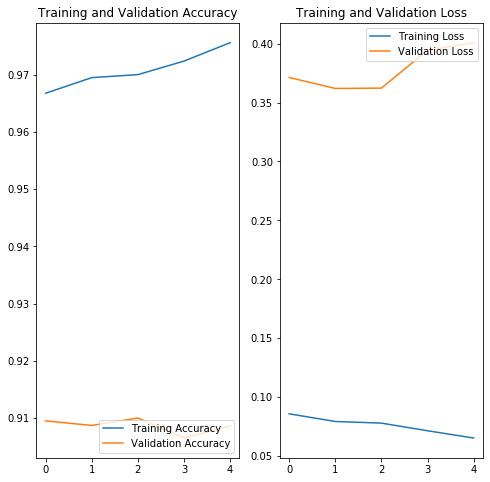

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()